In [2]:
from threeML import *
import numpy as np
from threeML.plugins import *
from skylab.datasets import Datasets
from astropy import units as u

import os, sys, glob, abc

def read(filelist):
    data = []
    for f in sorted(filelist):
        x = np.load(f)
        if len(data) == 0: data = x.copy()
        else: data = np.concatenate([data, x])
    return data

# Where is the dataset stored?
dataset = "/data/i3store/users/mjlarson/student_data"

# Read in all of the data files
data_files = dataset + "/IC86_*exp.npy"
exp = read(glob.glob(data_files))

# Read in all of the MC files 
sim_files = dataset + "/IC86*MC*npy"
mc = read(glob.glob(sim_files))

# Set the angular error floor to 0.2 degrees
exp['angErr'][exp['angErr']<np.deg2rad(0.2)] = np.deg2rad(0.2)
mc['angErr'][mc['angErr']<np.deg2rad(0.2)] = np.deg2rad(0.2)

exp['ra']=np.random.uniform(0,2*np.pi,size=len(exp))
grl = np.load("/data/i3store/users/mjlarson/student_data/GRL/IC86_2012_exp.npy")
livetime = np.sum(grl['livetime'])


/data/disk01/home/jasonfan/threeML/threeML/__init__.py:12: UserWarning: No DISPLAY variable set. Using backend for graphics without display (Agg)
  warnings.warn("No DISPLAY variable set. Using backend for graphics without display (Agg)")
/data/disk01/home/jasonfan/miniconda3/envs/p3/lib/python3.6/site-packages/astromodels/core/parameter.py:555: UserWarning: We have set the min_value of K to 1e-99 because there was a postive transform
  warnings.warn('We have set the min_value of %s to 1e-99 because there was a postive transform' % self.path)
/data/disk01/home/jasonfan/miniconda3/envs/p3/lib/python3.6/site-packages/astromodels/core/parameter.py:555: UserWarning: We have set the min_value of xc to 1e-99 because there was a postive transform
  warnings.warn('We have set the min_value of %s to 1e-99 because there was a postive transform' % self.path)

Bad key "text.kerning_factor" on line 4 in
/data/disk01/home/jasonfan/miniconda3/envs/p3/lib/python3.6/site-packages/matplotlib/mpl-data/st

In [3]:
from imp import reload
reload(IceCubeLike)

import warnings
warnings.filterwarnings("ignore")

IceCube=IceCubeLike.IceCubeLike("test",exp,mc,livetime,sinDec_bins=np.linspace(-1,1,30))


In [20]:
from imp import reload
reload(IceCubeLike)
IceCube=IceCubeLike.IceCubeLike("test",exp,mc,livetime,sinDec_bins=np.linspace(-1,1,30))
source1_sp = Powerlaw()
#source1_sp._set_units(u.GeV,u.cm**-2 / u.s / u.GeV)
source1_sp.K=1e-13
source1_neutrino = Powerlaw()
source1_neutrino.K=1e-5
#source1_sp._set_units(u.GeV,u.cm**-2 / u.s / u.GeV)
source1 = PointSource("source1", ra=83.63, dec=22.0145, spectral_shape=source1_sp)
source1_nu = ParticleSource("source1_nu",distribution_shape=source1_neutrino)
model = Model(source1,source1_nu)
IceCube.add_injection(sample)
model.source1.spectrum.main.Powerlaw.K.fix = True
model.source1.spectrum.main.Powerlaw.index.fix = True
IceCubedata = DataList(IceCube)
jl = JointLikelihood(model, IceCubedata)
data=np.load("testdata.npy")
jl._data_list['test'].llh_model.update_data(data,10000/3600/24)


In [10]:
best_fit_parameters, likelihood_values = jl.fit()

(5.358401543281786, 281.81179918256004)
(5.372735879436477, 281.87003473291435)
(5.344104746773082, 281.75349559062664)
(5.384441463432468, 281.90918091233084)
(5.332492645244867, 281.7142003968711)
(489.0892525340704, nan)
(6.699557804968598, 286.24116929407114)
(6.724923497278665, 286.31454575081386)
(6.674286012131392, 286.16761244387436)
(6.725499164561616, 286.3092435815851)
(6.673720535998488, 286.1729086269993)
(37.789719300412, 236.21259808297611)
(9.395889988663505, 291.709182529477)
(9.427037351851729, 291.75579813147465)
(9.364843593263476, 291.6623452969841)
(9.42752927860215, 291.75000764230646)
(9.36436113548744, 291.6681268386946)
(21.599024685240575, 290.9083364289162)
(13.862467130797022, 295.0645911821852)
(13.898916677411306, 295.0730046942356)
(13.82611132249715, 295.0559112515725)
(13.88896851857708, 295.0707370384788)
(13.836015330840663, 295.05830438988863)
(13.89913438384907, 295.06761439273197)
(13.825900467151827, 295.06129267478246)
(13.888692355150388, 295.0

,result,unit
parameter,,
source1_nu.spectrum.main.Powerlaw.K,(2.0 -1.6 +6) x 10^-4,1 / keV
source1_nu.spectrum.main.Powerlaw.index,-2.20 +/- 0.15,



Correlation matrix:



1.00,-0.99
-0.99,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
test,-297.590155
total,-297.590155



Values of statistical measures:



,statistical measures
AIC,-597.180311
BIC,-595.180311


In [18]:
jl.likelihood_model.source1_nu.spectrum.main.Powerlaw.K.

Parameter K = 0.00020427588736511657 [1 / keV]
(min_value = 1e-30, max_value = 1000.0, delta = 0.1, free = True)

In [6]:
jl._data_list['test'].llh_model.update_spectrum(sp)
x=np.linspace(0,jl._data_list['test'].llh_model.N,100)
temp=[]
for i in x:
    temp.append(-jl._data_list['test'].llh_model.eval_llh_ns(i)[1])

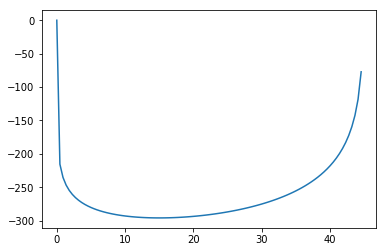

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt, colors

plt.plot(x,temp)